<a href="https://colab.research.google.com/github/danilo-dcs/imersao_dados_alura/blob/main/Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # importando o seaborn
sns.set()             # aplicando as configs do seaborn

# importando os dados de resultado
url_dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'
url_dados_experimentos = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados_res = pd.read_csv(url_dados_resultados)
dados_exp = pd.read_csv(url_dados_experimentos, compression='zip')

In [29]:
# tratamento
dados_exp.columns = dados_exp.columns.str.replace('-','_')
dados_exp = dados_exp.rename(columns={'droga': 'composto'})

In [30]:
# preparando o dataset de resposta
dados_res['n_moa'] = dados_res.drop('id', axis=1).sum(axis=1) # indicar o num de mecanismos ativos
dados_res['ativo_moa'] = (dados_res['n_moa'] != 0)   # indicar se algum moa foi ativo ou não nessa liha
dados_res.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [31]:
# Merge de datasets
dados_combinados = pd.merge(dados_exp, dados_res[['id' ,'n_moa','ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [32]:
### APLICANDO ANÁLISES DE MACHINE LEARNING
### VERIFICAR SE O MODELO ESTÁ ADEQUADO
## separar os dados de treino e de teste
from sklearn.model_selection import train_test_split

x=dados_combinados.select_dtypes('float64')   # assinatura celular mais os genes são os dados de alimentação do modelo
y=dados_combinados['ativo_moa']               # resposta do modelo

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, stratify=y, random_state=376)

modelo_rLogistica.fit(x_treino , y_treino)                     # treinando o modelo
modelo_rLogistica.score(x_teste,y_teste)                       # testando o modelo

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6269158093638463

In [33]:
### MODELOS SIMPLES JÁ IMPLEMENTADOS PELO SCIKIT
## treinando e conferindo a acuráca do modelo padrão

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)


0.6067604450976275

In [34]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

In [35]:
### MODELO DE ÁRVORE DE DECISÃO

from sklearn.tree import DecisionTreeClassifier

x=dados_combinados.select_dtypes('float64')   # assinatura celular mais os genes são os dados de alimentação do modelo
y=dados_combinados['ativo_moa']               # resposta do modelo

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth=3)     # instanciando o modelo
modelo_arvore.fit(x_treino , y_treino)                  # treinando o modelo
modelo_arvore.score(x_teste, y_teste)                   # testando o modelo


0.6105395758975436

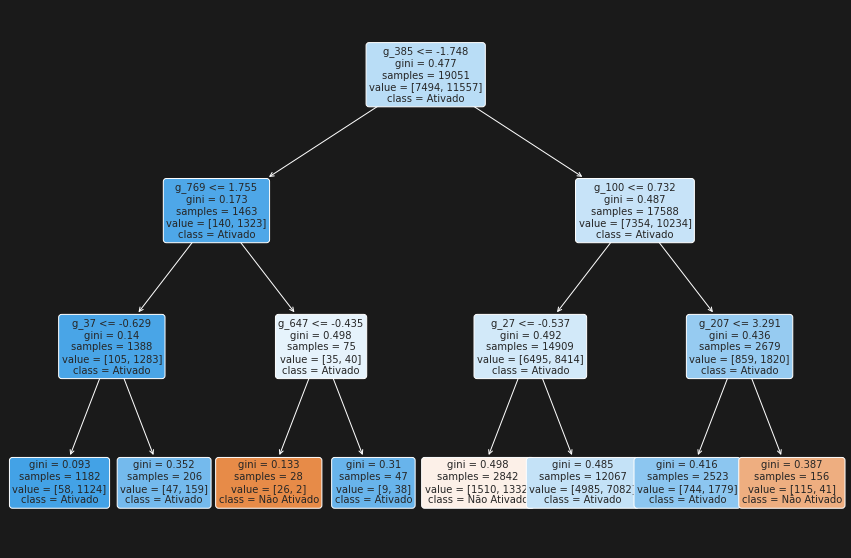

In [36]:
### PLOTAR A ÁRVORE AQUI
from sklearn import tree

fig, ax = plt.subplots(figsize=(15,10), facecolor='k')
tree.plot_tree(modelo_arvore,
              ax=ax,
              fontsize=10,
              rounded=True,
              filled=True,
              feature_names=x_treino.columns,
              class_names=['Não Ativado', 'Ativado']
)
plt.show()


In [37]:
# Fazer um teste de Iteração
teste=[]
treino=[]

for i in range(1,15):
  modelo_arvore = DecisionTreeClassifier(max_depth=1)     # instanciando o modelo
  modelo_arvore.fit(x_treino , y_treino)                  # treinando o modelo
  teste.append(modelo_arvore.score(x_teste, y_teste))
  treino.append(modelo_arvore.score(x_treino, y_treino))  

In [38]:
# Exibir os resultados aqui após diversos treinos, para diagnosticar se a precisão é sempre a mesma

print('\nTESTE \n')
print(teste)
print('\nTREINO: \n')
print(treino)



TESTE 

[0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275, 0.6067604450976275]

TREINO: 

[0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384, 0.6066348223190384]


In [39]:
pd.get_dummies(dados_combinados['tratamento'])   # função que vai criar duas novas colunas, transformando uma coluna de classes em duas outras colunas com 0's e 1's

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [ ]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose','tempo']) # realizando a quantização com o dummies dos valores descritivos em 0's e 1's

In [ ]:
### MODELO DE RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

x=dados_combinados.drop(['id','composto', 'n_moa', 'ativo_moa'], axis=1)   # remover essas colunas pois se quer selecionar todos os dados exceto os removidos
x = pd.get_dummies(x, columns=['tratamento', 'dose','tempo']) # realizando a quantização com o dummies dos valores descritivos em 0's e 1's
y=dados_combinados['ativo_moa']               # resposta do modelo

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, stratify=y, random_state=376)

modelo_randomForrest = RandomForestClassifier()                # instanciando o modelo
modelo_randomForrest.fit(x_treino , y_treino)                  # treinando o modelo
modelo_randomForrest.score(x_teste, y_teste)                   # testando o modelo


**# DESAFIO 1:** Testar outros modelos, e outros parâmetros dos modelos que foram usados em aula

**# DESAFIO 2:** Estudar a documentação do sklearn

**# DESAFIO 3:** Estudar o fluxograma 'Choosing The Right Model' do scikit

**# DESAFIO 4:** Testar outros problemas. Ex: se 1 ou mais mecanismos de ação foram ativados.

**# DESAFIO 5:** Escolha a droga mais utlizada e os controles tente prever com o modelo quando é utilizado a droga ou não, ou seja, para prever esta label, ou seja, identificar se fui utilizada a droga com base nas assinaturas celulares.

**# DESAFIO 6:** Fazer o resumo do que aprendeu